In [1]:
print("Project 3 by Luke Buckner")
print("")
print("Link to GitHub Repositories : https://github.com/LukeBuckner?tab=repositories")
print("")
print("Dataset Chosen : Population and Specs for all Electrical Vehicles in Washington (state)")
print("")
print("Target Variable : Predict an EV's range based on its features")
print("")
print("Algorithm Chosen : Random Forest Regressor")
print("")
print("How it works: This algorithm is based on the Decision Tree algorithm that we discussed in class. It builds multiple decision trees during training and merges their predictions to obtain a more accurate and stable result")
print("")
print("What type of prediction tasks does it fit for? : It is most useful for regression, specifically for predicting numerical values, like our target variable")
print("")
print("Advantages : Very high prediction accuracy, can handle both numerical and categorical data, and is able to handle non-linearity")
print("")
print("Disadvantages : High memory usage and not well suited for really small datasets")

Project 3 by Luke Buckner

Link to GitHub Repositories : https://github.com/LukeBuckner?tab=repositories

Dataset Chosen : Population and Specs for all Electrical Vehicles in Washington (state)

Target Variable : Predict an EV's range based on its features

Algorithm Chosen : Random Forest Regressor

How it works: This algorithm is based on the Decision Tree algorithm that we discussed in class. It builds multiple decision trees during training and merges their predictions to obtain a more accurate and stable result

What type of prediction tasks does it fit for? : It is most useful for regression, specifically for predicting numerical values, like our target variable

Advantages : Very high prediction accuracy, can handle both numerical and categorical data, and is able to handle non-linearity

Disadvantages : High memory usage and not well suited for really small datasets


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# drop columns - these are redundant and irrelevant to the target variable
columns_to_drop = ['Legislative District', '2020 Census Tract', 'Electric Utility', 'VIN (1-10)', 'Vehicle Location', 'DOL Vehicle ID']

# drop rows/columns with missing values
df_cleaned = df.drop(columns = columns_to_drop).dropna()

# data cleaning
non_numeric_columns = ['County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']

# feature engineering

# square "Electric Range" column. The research I did said that this could help in finding non-linear relationships
df_cleaned['Electric Range Squared'] = df_cleaned['Electric Range'] ** 2

# feature scaling
numeric_columns = [col for col in df_cleaned.columns if col not in non_numeric_columns]
scaler = MinMaxScaler()
df_scaled_numeric = pd.DataFrame(scaler.fit_transform(df_cleaned[numeric_columns]), columns = numeric_columns)

print("Columns after data cleaning:")
print("")
print(df_cleaned.columns)

Columns after data cleaning:

Index(['County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Electric Range Squared'],
      dtype='object')


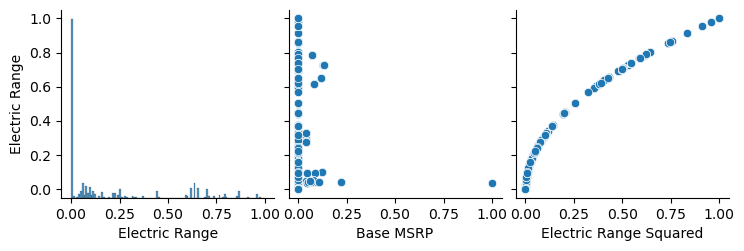

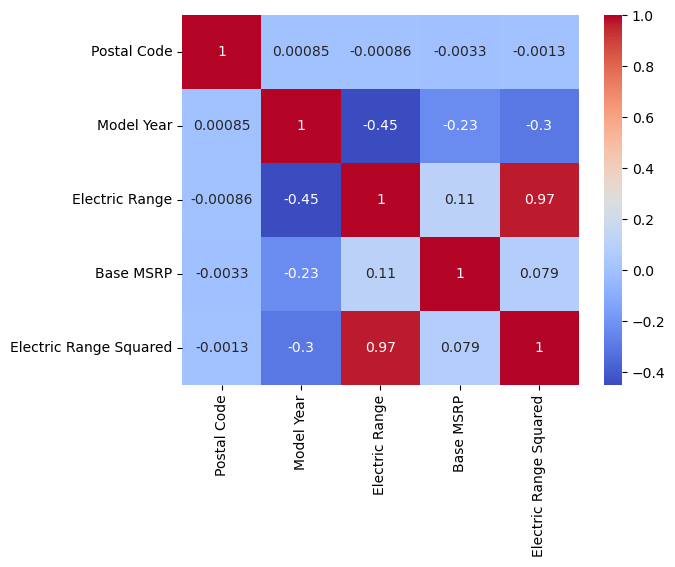

In [3]:
# relationship plots
sns.pairplot(df_scaled_numeric, x_vars = df_scaled_numeric.columns, y_vars = 'Electric Range')
plt.show()

# heatmpap to check for highly correlated features
correlation_matrix = df_cleaned.corr(numeric_only = True)
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm')
plt.show()

In [4]:
X = df_scaled_numeric.drop('Electric Range', axis = 1)
y = df_scaled_numeric['Electric Range']

# split data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [5]:
random_forest_regressor = RandomForestRegressor(n_estimators = 100, max_depth = 10, random_state = 42)

In [6]:
# train
random_forest_regressor.fit(X_train, y_train)

# predict
y_pred = random_forest_regressor.predict(X_test)

In [7]:
# evaluate using Mean Squared Error and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) 

print(f'Mean Squared Error: {mse}')
print("")
print(f'R-squared Score: {r2}')

Mean Squared Error: 1.7724739188541406e-11

R-squared Score: 0.9999999997724306
